### 목표 설정
- 최근접 이웃 알고리즘을 이용해서 붓꽃의 품종을 예측해보자.
- 최근접 이웃 알고리즘의 하이퍼 파라미터를 수정해보고 결과를 예측해보자.

## 데이터 수집

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#iris데이터가 가진 키 값을 확인
iris.keys()
# data : X, 문제 데이터
# target : y, 정답 데이터(0, 1, 2)
# feature_names:특성의 이름, 컬럼명
# target_names : 정답 데이터 이름, 꽃의 이름
# DESCR:readme.txt

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# DESCR
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# 문제 데이터 확인하기
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# 정답 데이터 확인하기
iris['target'] # 정답이 섞여있지 않구나. 한쪽으로 쏠릴 수 있겠다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 특성 이름 확인하기
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# 타겟 이름 확인하기
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 전처리

In [10]:
#가시성을 위한 데이터 프레임화
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
#iris_df의 간략한 정보 보기
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
# 기술통계 확인하기
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
X = iris_df
y = iris['target']

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
#train/test 분리
#train_test_split
from sklearn.model_selection import train_test_split

In [18]:
#train_test_split(문제 데이터, 정답 데이터, 테스트 세트의 비율, 랜덤시드값)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [20]:
y_train

array([0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0])

In [21]:
# np.bincount() : 판다스의 value_counts() 같은 함수
np.bincount(y_train)

array([38, 34, 33], dtype=int64)

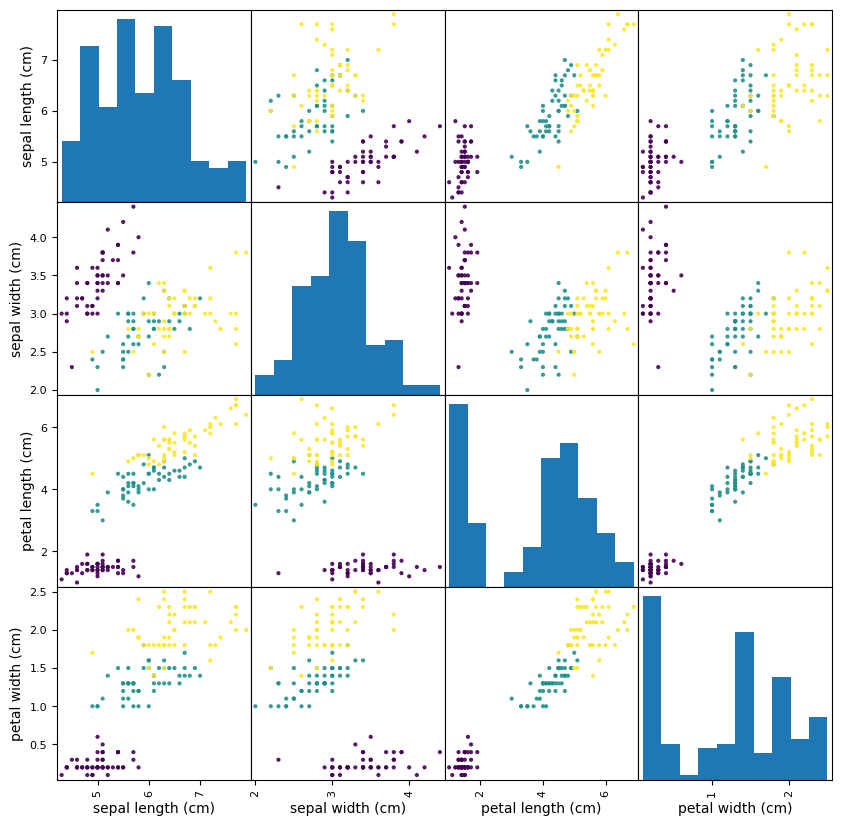

In [25]:
# 산접도 행렬 : 한번에 변수 간의 관계를 살펴볼때 편리한 차트
pd.plotting.scatter_matrix(iris_df, # 문제 데이터
                          figsize=(10,10), # 그래프의 크기
                          c = y, #색상설정
                          alpha = 0.9 # 산점도 투명도
                          )
plt.show()

### 모델링

In [26]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#모델 객체 생성
knn_iris01 = KNeighborsClassifier()

In [32]:
# 모델 학습
knn_iris01.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# 모델예측
pre = knn_iris01.predict(X_test)
print('테스트 셋트를 이용한 예측 값 : ', pre)
print("예상되는 품종은? \n", iris['target_names'][pre])

테스트 셋트를 이용한 예측 값 :  [2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 1 2 2 0 0 1 2 1 1 2 1 1 1 2 2 2 1 0 2 1 0 0
 0 0 2 2 1 2 2 1]
예상되는 품종은? 
 ['virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor']


In [34]:
# 모델 평가
knn_iris01.score(X_test,y_test)

0.9111111111111111

### 하이퍼 파라미터 조정
- knn모델에서는 살펴보는 이웃의 수(n_neighbors)값을 의미

In [38]:
# 하이퍼 파라미터 수정시 나오는 정확도를 저장하는 공간
train_list =[]
test_list = []

# 반복문 시작! 1부터 50까지의 n_neighbors 조정해주는 반복문을 만들자
for k in range(1, 51):
    # 모델 생성
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습
    knn_model.fit(X_train, y_train)
    
    # train 세트의 정확도 저장
    train_score = knn_model.score(X_train, y_train)
    train_list.append(train_score)
    # test 세트의 정확도 저장
    test_score = knn_model.score(X_test, y_test)
    test_list.append(test_score)

In [39]:
train_list, test_list

([1.0,
  0.9904761904761905,
  0.9714285714285714,
  0.9714285714285714,
  0.9809523809523809,
  0.9904761904761905,
  0.9904761904761905,
  0.9809523809523809,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9809523809523809,
  0.9904761904761905,
  0.9714285714285714,
  0.9809523809523809,
  0.9714285714285714,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9809523809523809,
  0.9809523809523809,
  0.9809523809523809,
  0.9809523809523809,
  0.9904761904761905,
  0.9809523809523809,
  0.9904761904761905,
  1.0,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9904761904761905,
  0.9809523809523809,
  0.9714285714285714,
  0.9809523809523809,
  0.9809523809523809,
  0.9619047619047619,
  0.9809523809523809,
  0.9428571428571428,
  0.9428571428571428,
  0.9428571428571428,
  0.9333333333333333,
  0.9238095238095239,
  0.93333333333333

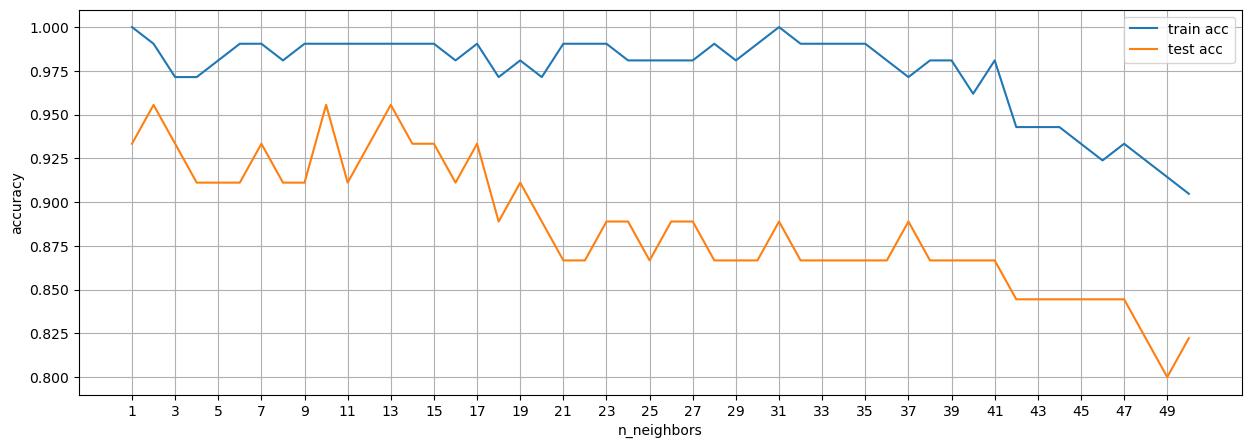

In [41]:
# 위에서 구한 정확도를 가지고 그래프를 그려보자
plt.figure(figsize=(15,5))
plt.plot(range(1,51), train_list, label='train acc')
plt.plot(range(1,51), test_list, label='test acc')
plt.xticks(range(1, 50, 2))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()